In [22]:
from sklearn import datasets
from sklearn import decomposition
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble

In [2]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape

(1140, 50, 37)

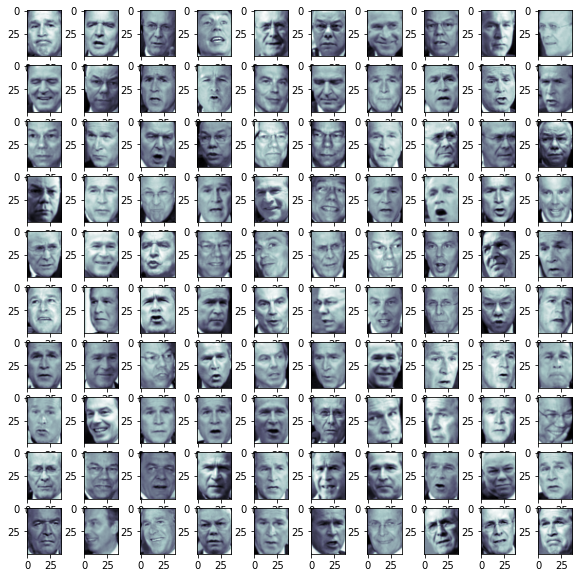

In [6]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1) #position i+1
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [20]:
x=lfw.data
y=lfw.target
x_train,x_test, y_train, y_test = train_test_split(x, y,random_state=0)
pca=PCA()

In [23]:
pca.fit(x_train)

PCA()

In [24]:
k=0
total=pca.explained_variance_.sum()
sum=0
while sum/total <0.99:
    sum+=pca.explained_variance_[k]
    k=k+1
k

316

In [25]:
pca=PCA(n_components=k,whiten =True) #whiten =True works like feature scaling
#affects features after applying pca so they produce better results
transformed_Data=pca.fit_transform(x_train)
transformed_Data.shape

(855, 316)

In [26]:
x_approx=pca.inverse_transform(transformed_Data)
x_approx.shape

(855, 1850)

In [27]:
x_approx_images=x_approx.reshape((855,50,37))

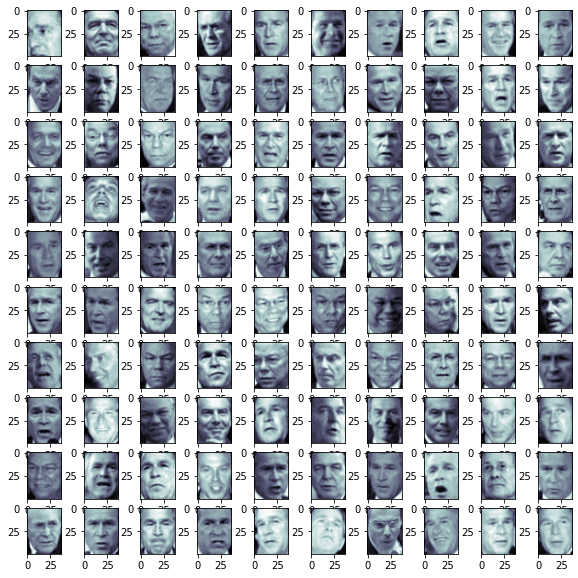

In [28]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1) #position i+1
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [29]:
eigenvec=pca.components_
eigenvec.shape

(316, 1850)

In [30]:
eigenfaces=eigenvec.reshape((k,50,37))

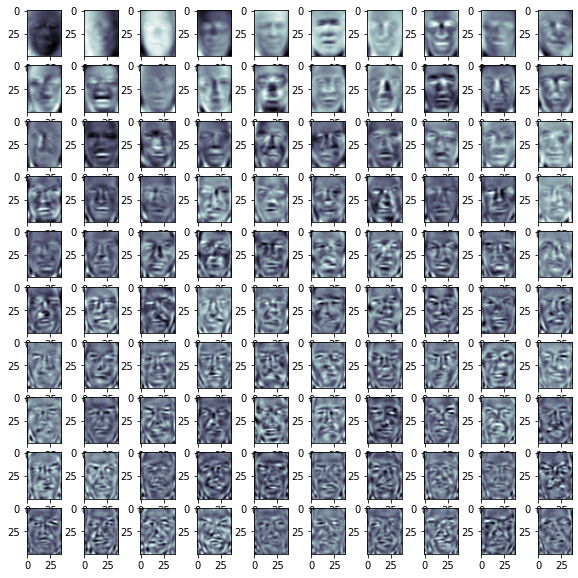

In [31]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1) #position i+1
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

In [32]:
train_pca=transformed_Data
test_pca=pca.transform(x_test)

In [41]:
import time
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
end=time.time()
print(end-start)
pred=rf.predict(x_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

5.959534645080566
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        61
           1       0.90      0.25      0.39        36
           2       0.58      0.98      0.73       122
           3       1.00      0.13      0.23        31
           4       0.80      0.23      0.36        35

    accuracy                           0.65       285
   macro avg       0.82      0.47      0.50       285
weighted avg       0.75      0.65      0.60       285

[[ 45   0  16   0   0]
 [  6   9  21   0   0]
 [  2   0 120   0   0]
 [  1   1  23   4   2]
 [  1   0  26   0   8]]


#### wrongly classifying images of class 2 bcoz of its high no

In [44]:
import time
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(train_pca,y_train)
end=time.time()
print(end-start)
pred=rf.predict(test_pca)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

4.599170207977295
              precision    recall  f1-score   support

           0       0.70      0.26      0.38        61
           1       0.00      0.00      0.00        36
           2       0.46      0.99      0.63       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.48       285
   macro avg       0.23      0.25      0.20       285
weighted avg       0.35      0.48      0.35       285

[[ 16   1  44   0   0]
 [  2   0  34   0   0]
 [  1   0 121   0   0]
 [  1   0  30   0   0]
 [  3   0  32   0   0]]


c:\users\mridu\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### with pca it's even worse